# <center> Heart Disease Prediction Using SVM </center>
According to Age, Gender, Chest pain type, Sugar level, Heart rate, Cholestrol and so on, we will predict probability of Heart Disease. Well our target feature as boolean or binary type.
<br>We might use classification machine learning algorithms for fitting to predicted results.
<br>
<br> So lets dive in **'What Causes Heart Disease?'**

# Loading the data

In [16]:
# Importing neccesery library

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline



In [36]:
#Loading the CSV file
data = pd.read_csv('https://github.com/mdimran1/Dataset/blob/main/heart.csv?raw=true')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
for col in data.columns:
  print(f'{col}: {data[col].unique()}')

Age: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingBP: [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol: [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 40

## Data Understanding

---

Here is the summery of dataset catagorized by columns. Also we should recheck the distribution of data values and standard real word values from [Source](https:///www.google.com)

* **age**: The person's age in years
* **sex**: The person's sex (1 = male, 0 = female)
* **ChestPainType**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) [Source link](https://https://www.mayoclinic.org/diseases-conditions/chest-pain/symptoms-causes/syc-20370838)
* **RestingBP**: The person's resting blood pressure (mm Hg on admission to the hospital)
* **Cholesterol**: The person's cholesterol measurement in mg/dl
* **FastingBS**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* **RestingECG**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* **MaxHR** : The person's maximum heart rate achieved. Value: numerical
* **ExerciseAngina**: Exercise induced angina (1 = yes; 0 = no) Binary Type
* **oldpeak**: Exercise relative to rest(oldpeak), the slope of the peak. exercise ST segment(slope), number of major vessels. the ST segment connects the QRS complex and the T wave and has a duration of 0.005 to 0.150 sec  [Ref. Link](https://https://en.wikipedia.org/wiki/ST_segment)
* **ST_Slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* **HeartDisease**: Heart disease (0 = no, 1 = yes) **Target Feature**

---
Observations:

* No null or missing value visible.
* Data Formating is good enough.
* Data Distribution Is Normal.


In [25]:
# Missing value:
data.isna().any()

# checking Data Types:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [19]:
# data distribution :
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Data distribution ploting :
for col in data.select_dtypes(include='number').columns:
  sns.displot(data=data, x=col, kind="kde")

# Exploratory Data Analysis 

---



*   Males are highly fraught with danger in Heart Disease.
*   79% patients of heart disease has asymptomatic Chest Pain.
* Most of patients has Exercise induced angina.
* Age above 60 is more ancillary for Heart Disease



In [47]:
#Extracting the categorical columns
cat_cols = [col for col in data.columns if data[col].dtypes =='O']
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [104]:
# Chestpain type portion for heart disease

data.groupby(['ChestPainType'])['HeartDisease'].value_counts(normalize=True)

ChestPainType  HeartDisease
ASY            1               0.790323
               0               0.209677
ATA            0               0.861272
               1               0.138728
NAP            0               0.645320
               1               0.354680
TA             0               0.565217
               1               0.434783
Name: HeartDisease, dtype: float64

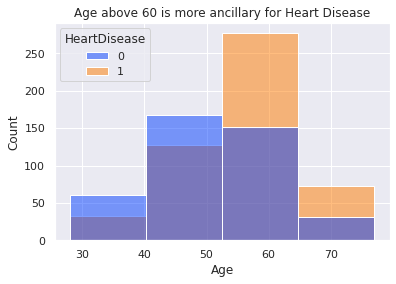

In [86]:
sns.histplot(data=data, x = 'Age', hue='HeartDisease', bins=4, palette='bright' )
plt.title('Age above 60 is more ancillary for Heart Disease')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


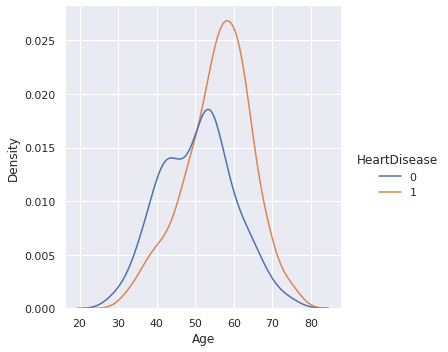

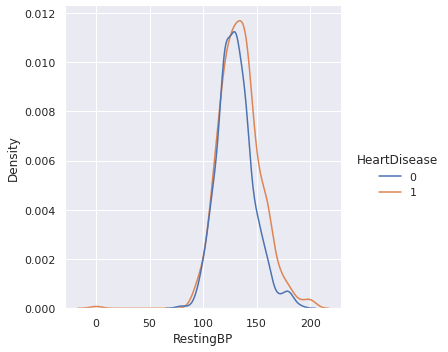

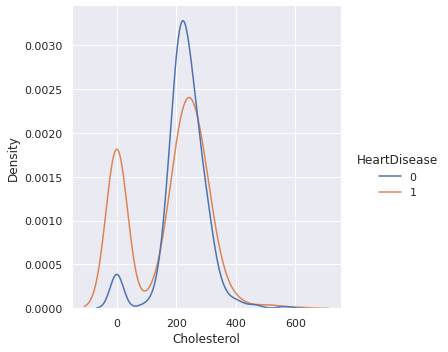

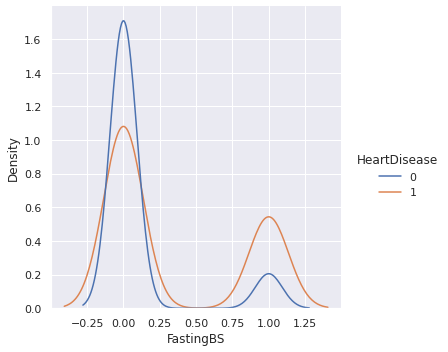

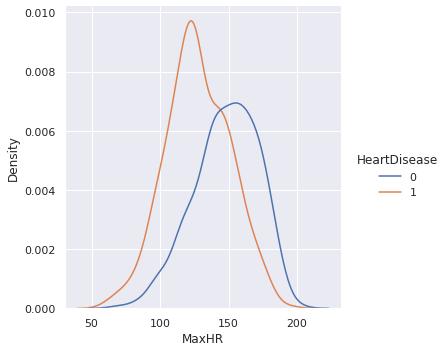

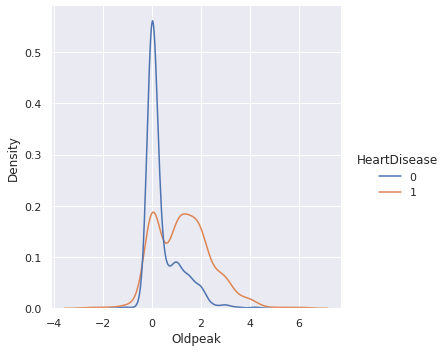

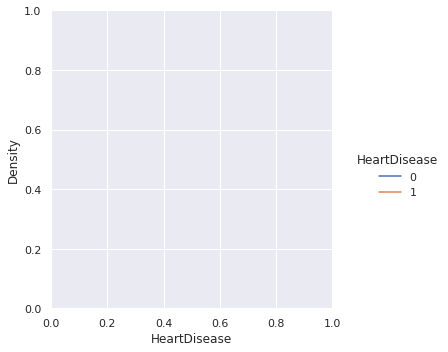

In [92]:
for col in data.select_dtypes(include='number').columns:
  sns.displot(data=data, x=col, hue='HeartDisease', kind="kde")

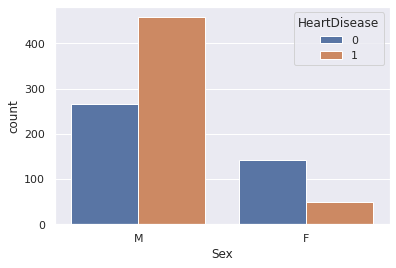

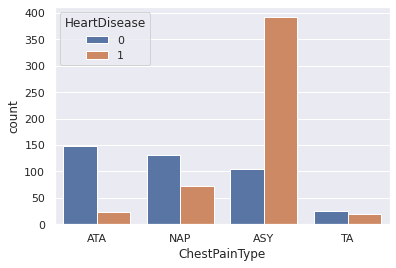

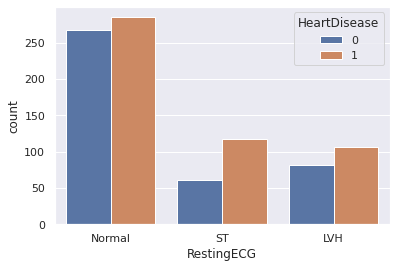

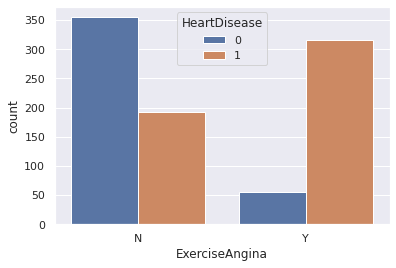

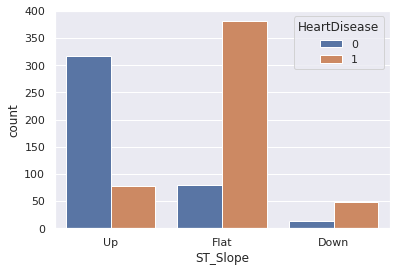

In [103]:
for col in data.select_dtypes(include='object').columns:
  
  sns.countplot(data=data, x=col, hue='HeartDisease')
  plt.show()

In [110]:
# the slope of the peak exercise ST segment
#Flat & Down risk rate consecutively 83% & 78% 

data.groupby(['ST_Slope'])['HeartDisease'].value_counts(normalize=True)

ST_Slope  HeartDisease
Down      1               0.777778
          0               0.222222
Flat      1               0.828261
          0               0.171739
Up        0               0.802532
          1               0.197468
Name: HeartDisease, dtype: float64

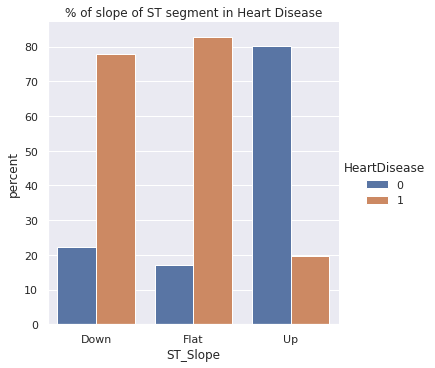

In [122]:
x,y = 'ST_Slope', 'HeartDisease'

(data.groupby(x)[y].value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.title('% of slope of ST segment in Heart Disease')
plt.show()

In [ ]:
#Extracting the numerical columns
num_col = [feature for feature in df.columns if df[feature].dtypes != 'O']

<AxesSubplot:>

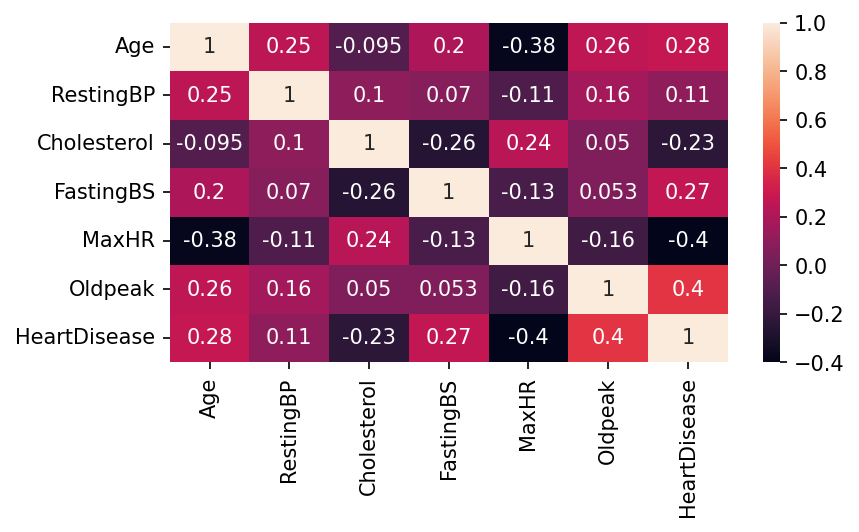

In [ ]:
#Plotting a heatmap on the correlation values
plt.figure(figsize=(6,3), dpi=150)
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Finding the best correlation with the 'HeartDisease' column 
df.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

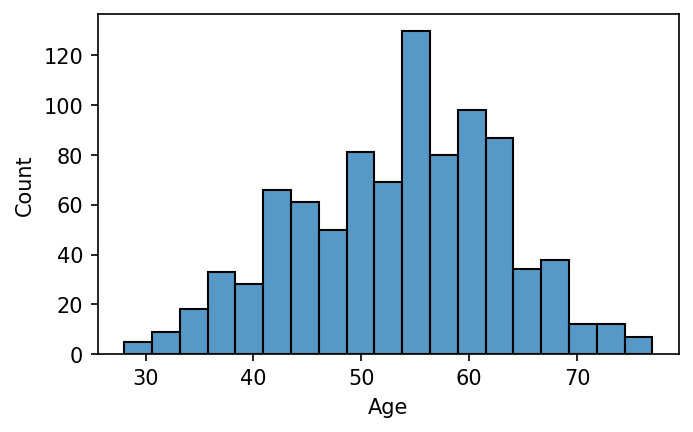

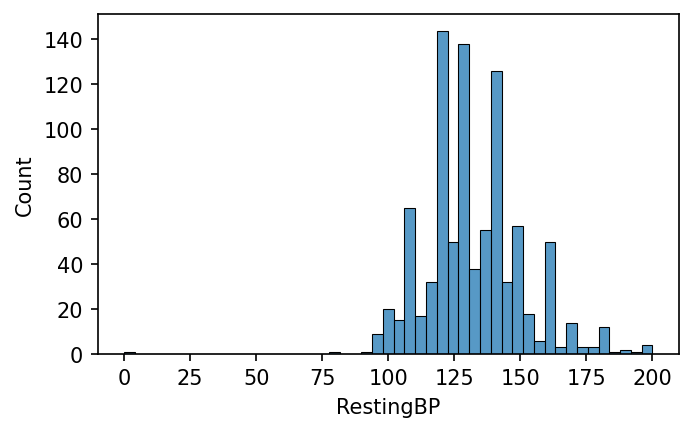

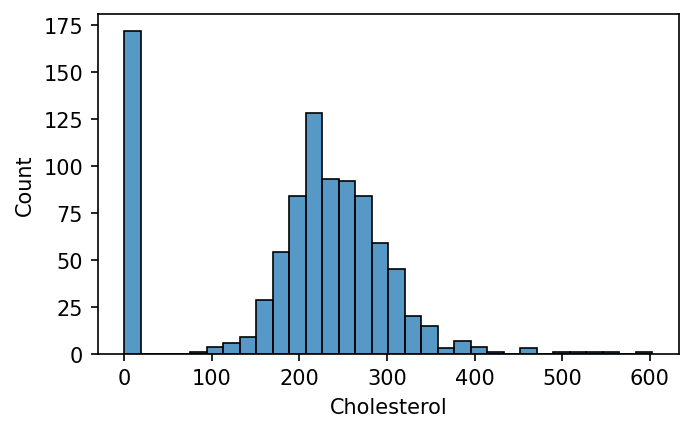

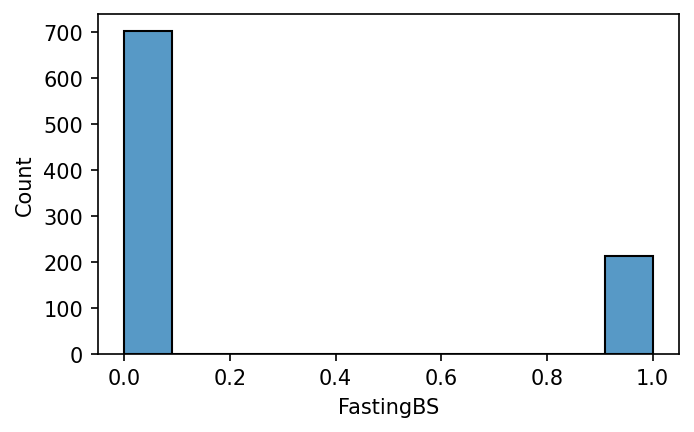

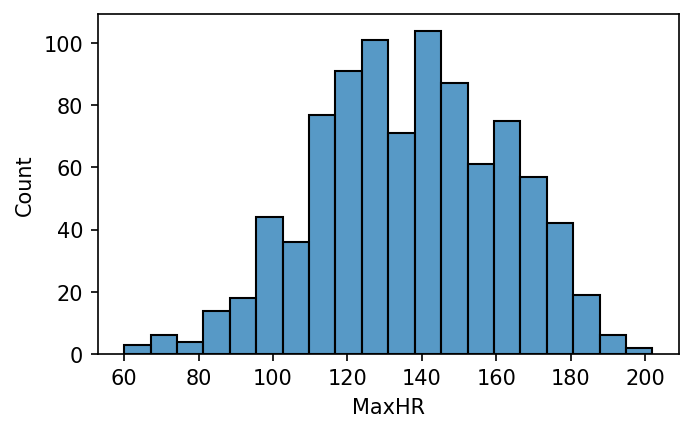

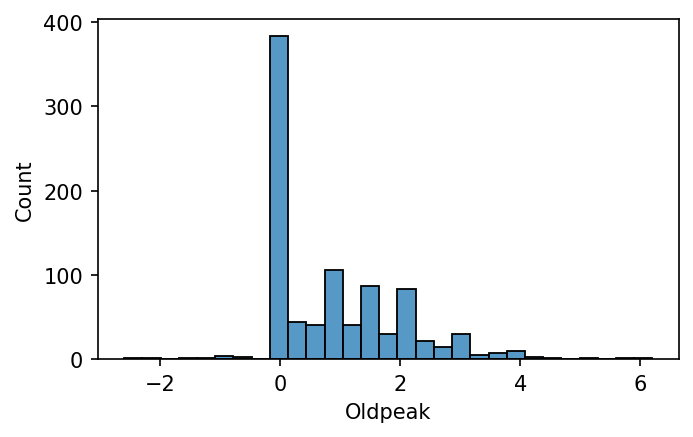

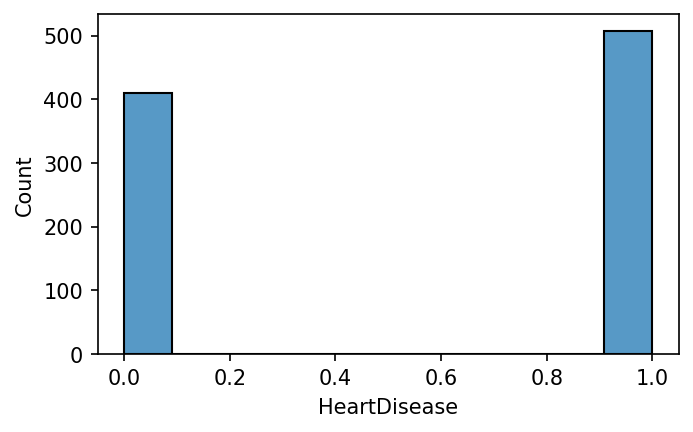

In [ ]:
#Plotting the distributions of the numerical variables
for col in num_col:
    plt.figure(figsize=(5,3), dpi=150)
    sns.histplot(df[col])

In [ ]:
#Encoding the features using get dummies method
df=pd.get_dummies(df)

# Building the model

In [ ]:
#Preparing the dataset for training
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
#Scaling the features using pipeline
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

# Support Vector Classifier(with default parameters)

A support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.

![](https://blog.paperspace.com/content/images/2020/03/svm.png)

In [ ]:
#Fitting the model on SVC with default parameters
model_svc = SVC()
model_svc.fit(scaled_X_train,y_train)

SVC()

#### Checking the default parameters in an SVC

In [ ]:
model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
#Calculating predictions, and accuracy score
pred_svc = model_svc.predict(scaled_X_test)
accuracy_score(y_test,pred_svc)

0.8840579710144928

In [ ]:
#Building classification report
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87       125
           1       0.87      0.93      0.90       151

    accuracy                           0.88       276
   macro avg       0.89      0.88      0.88       276
weighted avg       0.89      0.88      0.88       276



#### We get an accuracy of 88.4% without tuning the hyperparameters. So let's try tuning the hyperparameters and check if it improves our accuracy

# Hyperparameter Tuning with GridSearchCV

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [ ]:
#Hyperparamter tuning using Gridsearch
svm = SVC()
# param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm,param_grid)

In [ ]:
#Fitting the model
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [ ]:
#Calculating the accuracy of tuned model
grid_svc = grid.predict(scaled_X_test)
accuracy_score(y_test,grid_svc)

0.8913043478260869

In [ ]:
#Classification report for the tuned model
print(classification_report(y_test,grid_svc))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       125
           1       0.90      0.91      0.90       151

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



#### We get an accuracy of 89.13% with hyperparameter tuning, accounting for 0.7% increase in accuracy

# Best Parameters

In [ ]:

print(grid.best_params_)
print(grid.best_estimator_.get_params())

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


#### The best parameters in this model is:
#### C=100 , gamma = 0.001, kernel: rbf